#Description: 


- @Author: Juan sebastian suarez corredor
- @Date:2022/03/19
- @Description: We are going to apply the algorithm on a data set of Alibaba shares from the United States stock market, where we will find:

  - The CLOSE signal (daily closing price)
  - The VOLUME signal (number of shares that have changed hands over that period of time).


#DATOS DE MERCADEO DE VALORES (Acciones de Alibaba)

#Importando librerías generales


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Descargando data usando Web-scrawping


In [7]:
UrlWeb= "https://finance.yahoo.com/quote/BABA/history?period1=1577836800&period2=1647648000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
ClassName="W(100%) M(0)"  

#Importando Beautiful

In [8]:
import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

Opt2-con Selenium




In [9]:
!pip install kora -q
!apt install chromium-chromedriver
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (99.0.4844.51-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 63 not upgraded.


In [18]:
from kora.selenium import wd
wd.get(UrlWeb)
soup = BeautifulSoup(wd.page_source, 'html.parser') 

In [19]:
tabla= soup.find_all(class_=ClassName)

df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df=pd.DataFrame(df_list_table[0])    

ValueError: ignored

In [ ]:
#df.head(10)                                                       #LAS PRIMERAS FILAS
df.tail(10) 

,Fecha,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
91,08 nov 2021,161.76,162.16,159.48,162.16,162.16,16223100
92,05 nov 2021,164.79,164.79,158.30,158.73,158.73,22098200
93,04 nov 2021,169.28,169.94,164.50,164.79,164.79,16669200
94,03 nov 2021,165.36,166.65,163.11,166.24,166.24,13569700
95,02 nov 2021,167.10,167.10,162.76,162.90,162.90,19072900
96,01 nov 2021,165.84,171.90,165.80,170.17,170.17,17609500
97,29 oct 2021,167.07,168.56,162.72,164.94,164.94,17155400
98,28 oct 2021,168.49,170.35,166.77,169.79,169.79,12440100
99,27 oct 2021,167.53,172.45,167.34,169.23,169.23,11801800
100,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...


In [ ]:
#tenemosque borrar la ultima fila
df = df[:-1]

#Conociendo los datos descargados

In [ ]:
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())
#print("Rows, Cols->",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              100 non-null    object
 1   Abrir              100 non-null    object
 2   Alto               100 non-null    object
 3   Bajo               100 non-null    object
 4   Cierre*            100 non-null    object
 5   Cierre ajustado**  100 non-null    object
 6   Volumen            100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB
None
____________describe____________
               Fecha   Abrir    Alto   Bajo Cierre* Cierre ajustado**   Volumen
count           100     100     100    100     100               100       100
unique           99      97      98     96      99                99       100
top     18 mar 2022  100.50  111.74  99.60  108.30            108.30  83215498
freq              2       2       2      2       2                 2         1


#Normalización de los datos.

#Convertimos los campos object a datetime o numeric (int/float)

In [ ]:
df['Fecha']= df['Fecha'].str.replace(' ene ','/01/')
df['Fecha']= df['Fecha'].str.replace(' feb ','/02/')
df['Fecha']= df['Fecha'].str.replace(' mar ','/03/')
df['Fecha']= df['Fecha'].str.replace(' abr ','/04/')
df['Fecha']= df['Fecha'].str.replace(' may ','/05/')
df['Fecha']= df['Fecha'].str.replace(' jun ','/06/')
df['Fecha']= df['Fecha'].str.replace(' jul ','/07/')
df['Fecha']= df['Fecha'].str.replace(' ago ','/08/')
df['Fecha']= df['Fecha'].str.replace(' sep ','/09/')
df['Fecha']= df['Fecha'].str.replace(' oct ','/10/')
df['Fecha']= df['Fecha'].str.replace(' nov ','/11/')
df['Fecha']= df['Fecha'].str.replace(' dic ','/12/')

In [ ]:
df['Fecha']=pd.to_datetime(df['Fecha'], dayfirst = True)        # Convertimos el campo FECHA en tipo DATETIME
df['Abrir'] = pd.to_numeric(df['Abrir'])                        #  convertimos el campo a numerico 
df['Alto'] = pd.to_numeric(df['Alto'])
df['Bajo'] = pd.to_numeric(df['Bajo'])
df['Cierre*'] = pd.to_numeric(df['Cierre*'])
df['Cierre ajustado**'] = pd.to_numeric(df['Cierre ajustado**'])
df['Volumen'] = pd.to_numeric(df['Volumen'])

#Eliminando columnas que no necesitaremos 

In [ ]:
#borrar nulos o no?
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Fecha'] # Guardamos la columna Date.
df = df.drop('Fecha', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Normaliza todos los datos entre [0, 1].

In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:'Abrir',1:'Alto',2:'Bajo',3:'Cierre*',4: 'Cierre ajustado**', 5: 'Volumen'})

In [ ]:
df_escalado.head()
#df_escalado.isnull().sum()

,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
0,0.269696,0.342325,0.279821,0.337651,0.337651,0.489815
1,0.269696,0.342325,0.279821,0.337651,0.337651,0.493147
2,0.255256,0.235619,0.239103,0.252757,0.252757,0.472820
3,0.179444,0.277326,0.147140,0.302109,0.302109,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.509750


#Representación gráfica de los datos.

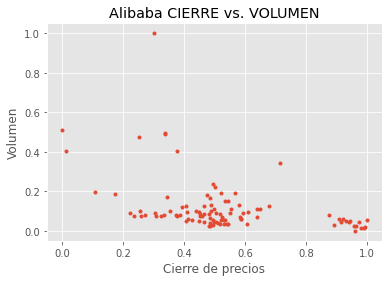

In [ ]:
#%% Representación gráfica de los datos.
x = df_escalado['Cierre*'].values
y = df_escalado['Volumen'].values
plt.xlabel('Cierre de precios')
plt.ylabel('Volumen')
plt.title('Alibaba CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=3)

#Aplicación de k-means.

#Realizar una gráfica elbow o de codo

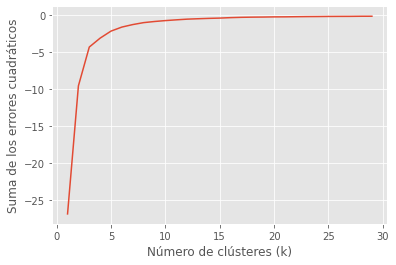

In [ ]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

#Aplicar el algoritmo de k-mean

In [ ]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.62479059 0.6042923  0.61113474 0.59778872 0.59778872 0.11497399]
 [0.1722588  0.20376991 0.16438089 0.20681226 0.20681226 0.56121678]
 [0.9669184  0.95246317 0.95888927 0.94754309 0.94754309 0.03921897]
 [0.47994974 0.46528229 0.47227169 0.46940237 0.46940237 0.08935175]
 [0.28303957 0.25986711 0.27268056 0.26123185 0.26123185 0.10764222]]


#Etiquetado de datos.

In [ ]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [ ]:
df.head(10)

,Date,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen,label
0,2022-03-18,100.50,111.74,99.60,108.30,108.30,83215498,1
1,2022-03-18,100.50,111.74,99.60,108.30,108.30,83715800,1
2,2022-03-17,99.14,101.89,95.77,100.37,100.37,80663200,1
3,2022-03-16,92.00,105.74,87.12,104.98,104.98,159834300,1
4,2022-03-15,75.10,80.14,73.28,76.76,76.76,86209300,1
5,2022-03-14,80.70,82.45,77.08,77.76,77.76,69992600,1
6,2022-03-11,93.26,93.95,86.68,86.71,86.71,39277900,4
7,2022-03-10,95.19,95.70,90.82,92.92,92.92,37671200,4
8,2022-03-09,100.26,100.97,98.32,100.93,100.93,20853600,4
9,2022-03-08,99.32,100.91,95.57,97.50,97.50,23275500,4


#Representación gráfica de los clústeres k-means

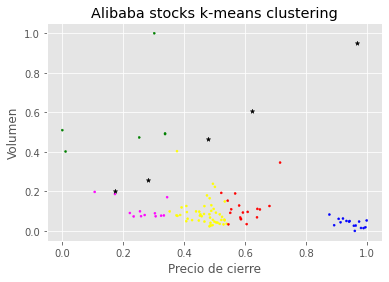

In [ ]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Alibaba stocks k-means clustering')
plt.show()